In [1]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

#Custome graph format style sheet
#plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = True
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.png'

Computer = "SciClone"   # "SciClone"    "WinLap"  "LinLap"   "Desktop"  "PortLap"

#Standard cycle for collors and line styles
default_cycler = (cycler('color', ['0.00', '0.40', '0.60', '0.70']) + cycler(linestyle=['-', '--', ':', '-.']))
plt.rc('axes', prop_cycle=default_cycler)
my_cmap = plt.get_cmap('gray')
PlotWidthIn = 11
PlotHeightIn = 3.75
PlotDPI = 120

In [2]:
import CoreFunctions as cf
import platform
import multiprocessing
from joblib import Parallel, delayed
import os

In [3]:
HostName = platform.node()

if HostName == "Server":
    Computer = "Desktop"   
elif HostName[-6:] == 'wm.edu':
    Computer = "SciClone"
elif HostName == "SchoolLaptop":
    Computer = "LinLap"
elif HostName == "WTC-TAB-512":
    Computer = "PortLap"
else:
    Computer = "WinLap"

if Computer == "SciClone":
    location = '/sciclone/home20/dchendrickson01/image/'
elif Computer == "WinLap":
    location = 'C:\\Data\\'
elif Computer == "Desktop":
    location = "E:\\Backups\\Dan\\CraneData\\Laser Data\\"
elif Computer == "LinLap":
    location = '/home/dan/Output/'
elif Computer == 'PortLap':
    location = 'C:\\users\\dhendrickson\\Desktop\\AccelData\\'
    

if Computer ==  "SciClone":
    rootfolder = '/sciclone/home20/dchendrickson01/'
    folder = '/sciclone/data10/dchendrickson01/SmallCopy/'
elif Computer == "Desktop":
    rootfolder = location
    folder = rootfolder #+ "SmallCopy\\"
elif Computer =="WinLap":
    rootfolder = location
    folder = rootfolder + "SmallCopy\\"   
elif Computer == "LinLap":
    rootfolder = '/home/dan/Data/'
    folder = rootfolder + 'SmallCopy/'
elif Computer =='PortLap':
    rootfolder = location 
    folder = rootfolder + 'SmallCopy\\'


In [51]:
def getDataFromfiles(file):
    try:
        DS = np.genfromtxt(open(file,'r'), delimiter=',',skip_header=0)
    except:
        print('Fail on file',file)
        DS = file
    return DS

In [56]:
files = os.listdir(folder)
AllData = Parallel(n_jobs=13)(delayed(getDataFromfiles)(folder + file) for file in files)


In [59]:
for i in range(len(files)):
    print(i, files[i])

0 Stack 52 - picking up box and leaving transfer zone.csv
1 stack 54 - 2nd crane moving slow speed.csv
2 Stack 54 not moving.csv
3 Test Stand 120Hz at 200khz sampling.csv
4 Test Stand 15000Hz at 200khz sampling.csv
5 Test Stand 3khz at 50khz sampling.csv
6 Test Stand 5000Hz at 200khz sampling.csv
7 Test Stand 500Hz at 200khz sampling.csv
8 Test Stand 500hz at 50khz sampling - high volume - 0.00 um.csv
9 Test Stand 500hz at 50khz sampling - high volume.csv
10 Test Stand 500hz at 50khz sampling.csv
11 Test Stand 60Hz at 200khz sampling.csv
12 Test Stand at rest at 200khz sampling.csv


In [60]:
np.shape(AllData[2])
DataSet = AllData[7]

In [62]:
FullFP1 = cf.getThumbprint2(DataSet[:,0], 'db3',2000,10)
FullFP2 = cf.getThumbprint2(DataSet[:,1], 'db3',2000,10)

MemoryError: Unable to allocate 8.94 GiB for an array with shape (2000, 599997) and data type float64

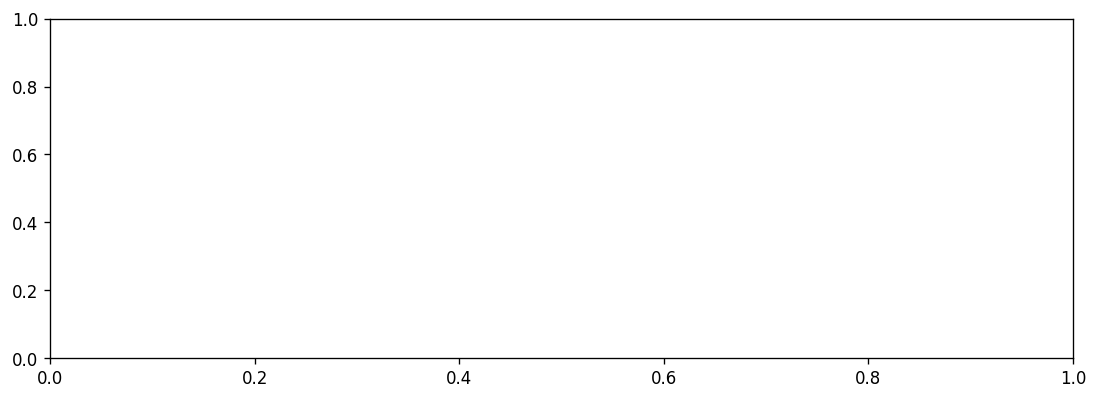

In [63]:
h = cf.PlotFingerPrint([FullFP1.T,'Laser run'])
hh = cf.PlotFingerPrint([FullFP2.T,'Laser run'])

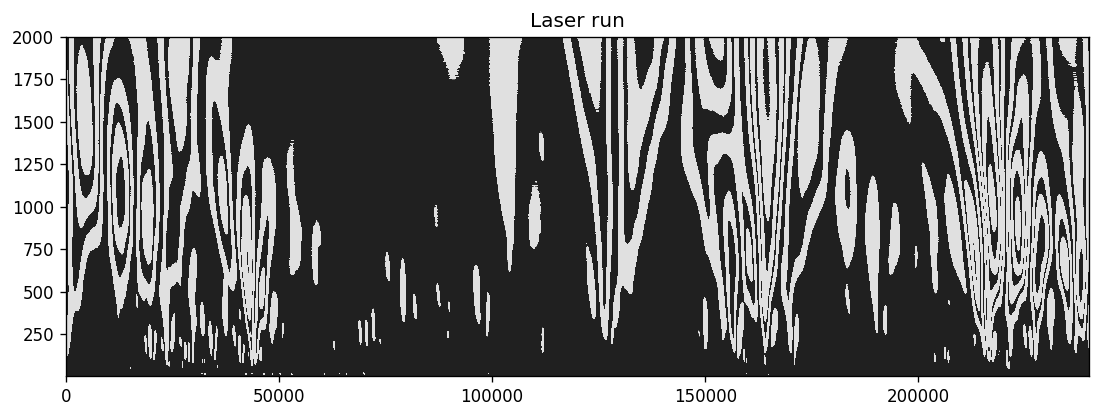

In [64]:
DifferenceSet = np.matrix(np.subtract(DataSet[:,0],DataSet[:,1])).T
print(np.shape(DifferenceSet))

(599997, 1)


In [65]:

DataSet = np.concatenate((DataSet, DifferenceSet), axis = 1)
filteredDataSet = cf.KalmanGroup(DataSet)


In [66]:
FullFP1 = cf.getThumbprint2(np.array(filteredDataSet[:,0].T).flatten(), 'db3',2000,10)
FullFP2 = cf.getThumbprint2(np.array(filteredDataSet[:,1].T).flatten(), 'db3',2000,10)
FullFP3 = cf.getThumbprint2(np.array(filteredDataSet[:,2].T).flatten(), 'db3',2000,10)

e:\Documents\Dan\Code\RMG_NDE_Disssertation\CoreFunctions.py:438: RuntimeWarning: invalid value encountered in true_divide
  cfX /= highest


MemoryError: Unable to allocate 8.94 GiB for an array with shape (599997, 2000) and data type float64

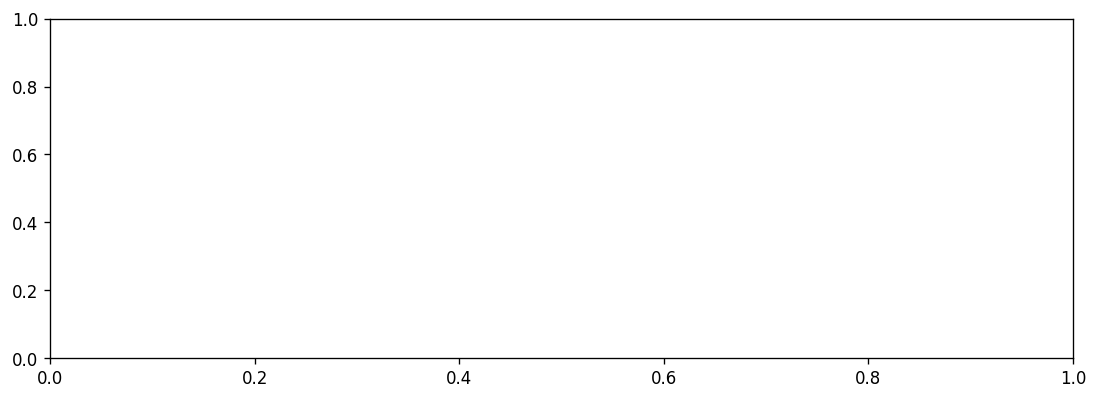

In [67]:
h1 = cf.PlotFingerPrint([FullFP1,files[2]+' Head 1'])
h2 = cf.PlotFingerPrint([FullFP2,files[2]+' Head 2'])
hd = cf.PlotFingerPrint([FullFP3,files[2]+' Head Diff'])

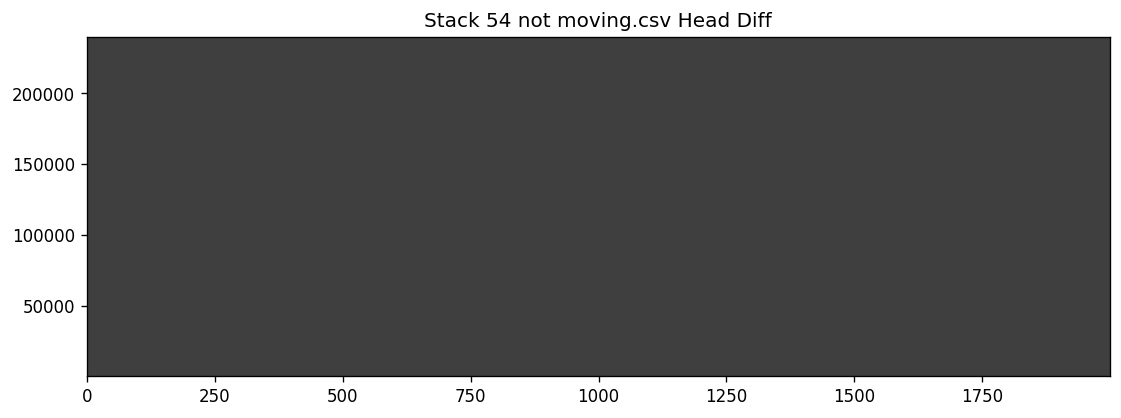

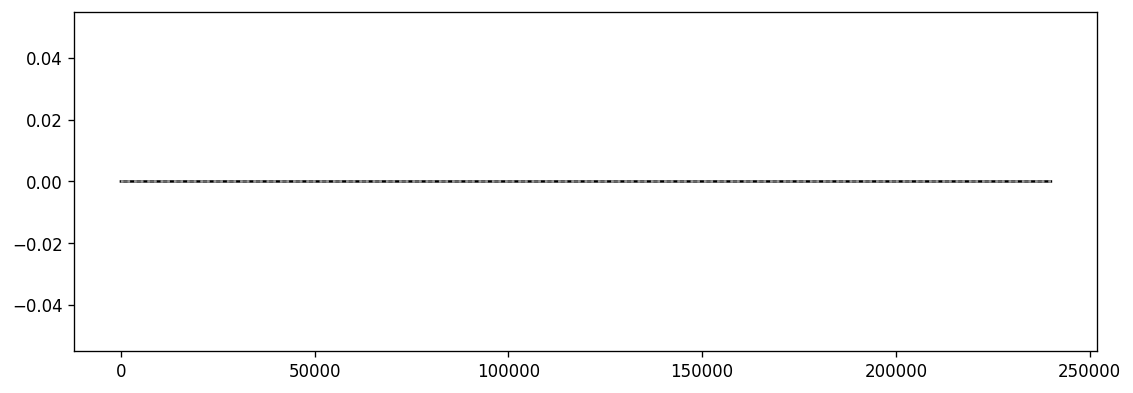

In [ ]:
fig = plt.figure(figsize=(PlotWidthIn,PlotHeightIn),dpi=PlotDPI)
plt.plot(filteredDataSet[:,0])
plt.plot(filteredDataSet[:,1])
plt.plot(filteredDataSet[:,2])
#plt.plot(DataSet[3,:])
plt.show()